# 1. FIND-s

In [9]:
import csv
lines=csv.reader(open("D1.csv",encoding="utf8"))

data=list()

for row in lines:
    if(row[-1]=='Y'):
        data.append(row)

numrows=len(data)
numcols=len(data[0])-1
hypothesis= ['%' for _ in range(numcols)]

for j in range(numcols):
    hypothesis[j]=data[0][j]
print(hypothesis)

for i in range(numrows):
    for j in range(numcols):
        if(hypothesis[j]!=data[i][j]):
            hypothesis[j]='?'
print(hypothesis)
        

['Japan', 'Honda', 'Blue', '“1980”', 'Economy']
['Japan', '?', '?', '?', 'Economy']


# 2. Candidate Elimination

In [10]:
import pandas as pd
import numpy as np
data=pd.DataFrame(pd.read_csv('D1.csv'))

features=np.array(data.iloc[:,0:-1])
target=np.array(data.iloc[:,-1])

specific=features[0].copy()
generic=[['?' for i in range(len(specific))] for i in range(len(specific))]
#print(generic)

for i,h in enumerate(features):
    if target[i]=='Y':
        for x in range(len(specific)):
            if h[x]!=specific[x]:
                specific[x]='?'
                generic[x][x]='?'
    
    elif target[i]=='N':
        for x in range(len(specific)):
            if h[x]!=specific[x]:
                generic[x][x]=specific[x]
            else:
                generic[x][x]='?'

for i in range(4):      
    generic.remove(['?','?','?','?','?'])

print(specific)
print(generic)

['Japan' '?' '?' '?' 'Economy']
[['Japan', '?', '?', '?', '?']]


# 3. ID3

In [5]:
import numpy as np
from csv import reader
from math import log2
from collections import Counter
from pprint import pprint

YES, NO = "Y", "N"


class Node:
    def __init__(self, label):
        self.label = label
        self.branches = {}


def entropy(data):
    total, positive, negative = len(
        data), (data[:, -1] == YES).sum(), (data[:, -1] == NO).sum()
    entropy = 0
    if positive:
        entropy -= positive / total * log2(positive / total)
    if negative:
        entropy -= negative / total * log2(negative / total)
    return entropy


def gain(s, data, column):
    values = set(data[:, column])
    gain = s
    for value in values:
        sub = data[data[:, column] == value]
        gain -= len(sub) / len(data) * entropy(sub)
    return gain


def bestAttribute(data):
    s = entropy(data)
    g = [gain(s, data, column) for column in range(len(data[0]) - 1)]
    return g.index(max(g))


def id3(data, labels):
    root = Node('Null')
    if entropy(data) == 0:
        root.label = data[0, -1]
    elif len(data[0]) == 1:
        root.label = Counter(data[:, -1]).most_common()[0][0]
    else:
        column = bestAttribute(data)
        root.label = labels[column]
        values = set(data[:, column])
        for value in values:
            nData = np.delete(
                data[data[:, column] == value], column, axis=1)
            nLabels = np.delete(labels, column)
            root.branches[value] = id3(nData, nLabels)
    return root


def getRules(root, rule, rules):
    if not root.branches:
        rules.append(rule[:-2] + "=> " + root.label)
    for value, nRoot in root.branches.items():
        getRules(nRoot, rule + root.label + "=" + value + " ^ ", rules)


def predict(tree, tup):
    if not tree.branches:
        return tree.label
    return predict(tree.branches[tup[tree.label]], tup)


labels = np.array(['Outlook', 'Temperature', 'Humidity', 'Wind', 'PlayTennis'])

with open('3-dataset.csv') as f:
    data = np.array(list(reader(f)))

tree = id3(data, labels)
rules = []
getRules(tree, "", rules)
pprint(sorted(rules))

tup = {}
for label in labels[:-1]:
    tup[label] = input(label + ": ")

print(predict(tree, tup))

['Outlook=Overcast => Y',
 'Outlook=Rain ^ Wind=F => Y',
 'Outlook=Rain ^ Wind=T => N',
 'Outlook=Sunny ^ Humidity=High => N',
 'Outlook=Sunny ^ Humidity=Normal => Y']
Outlook: Rain
Temperature: Cold
Humidity: High
Wind: F
Y


# 4. Backpropogation

In [23]:
import numpy as np

lines = csv.reader(open('Dataset4.csv'))
X=list()
y=list()
for r in lines:
    l1=list()
    l1.append(float(r[0]))
    l1.append(float(r[1]))
    l2=list()
    l2.append(float(r[2]))
    X.append(l1)
    y.append(l2)
X=np.array(X)
y=np.array(y)

print(X)
print(y)

#Sigmoid Function
def sigmoid(x): #this function maps any value between 0 and 1
    return 1/(1 + np.exp(-x))

#Derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)

#Variable initialization
epoch=10000 #Setting training iterations
lr=0.3 #Setting learning rate
inputlayer_neurons = 2 #number of features in data set
hiddenlayer_neurons = 3 #number of hidden layers neurons
output_neurons = 1 #number of neurons of output layer

#weight and bias initialization
wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bias_hidden=np.random.uniform(size=(1,hiddenlayer_neurons)) #bias matrix to the hidden layer
weight_hidden=np.random.uniform(size=(hiddenlayer_neurons,output_neurons)) #weight matrix to the output layer
bias_output=np.random.uniform(size=(1,output_neurons)) # matrix to the output layer

for i in range(epoch):
    #Forward Propogation
    hinp1=np.dot(X,wh)
    hinp= hinp1 + bias_hidden #bias_hidden GRADIENT DISCENT
    hlayer_activation = sigmoid(hinp)
    
    outinp1=np.dot(hlayer_activation,weight_hidden)
    outinp= outinp1+ bias_output
    output = sigmoid(outinp)
    
    #Backpropagation
    EO = y-output #Compare prediction with actual output and calculate the gradient of error (Actual – Predicted)

    outgrad = derivatives_sigmoid(output) #Compute the slope/ gradient of hidden and output layer neurons

    d_output = EO * outgrad #Compute change factor(delta) at output layer, dependent on the gradient of error multiplied by the slope of output layer activation

    EH = d_output.dot(weight_hidden.T)  #At this step, the error will propagate back into the network which means error at hidden layer. we will take the dot product of output layer delta with weight parameters of edges between the hidden and output layer (weight_hidden.T).

    hiddengrad = derivatives_sigmoid(hlayer_activation) #how much hidden layer weight contributed to error
    d_hiddenlayer = EH * hiddengrad


    #update the weights
    weight_hidden += hlayer_activation.T.dot(d_output) *lr# dot product of nextlayererror and currentlayerop
    bias_hidden += np.sum(d_hiddenlayer, axis=0,keepdims=True) *lr

    wh += X.T.dot(d_hiddenlayer) *lr
    bias_output += np.sum(d_output, axis=0,keepdims=True) *lr

print("Input: \n" + str(X))
print("Actual Output: \n" + str(y))
print("Predicted Output: \n" ,output)

[[ 2.7810836   2.550537  ]
 [ 1.46548937  2.36212508]
 [ 3.39656169  4.40029353]
 [ 1.38807019  1.85022032]
 [ 3.06407232  3.00530597]
 [ 7.62753121  2.75926224]
 [ 5.33244125  2.08862677]
 [ 6.92259672  1.77106367]
 [ 8.67541865 -0.24206865]
 [ 7.67375647  3.50856301]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
Input: 
[[ 2.7810836   2.550537  ]
 [ 1.46548937  2.36212508]
 [ 3.39656169  4.40029353]
 [ 1.38807019  1.85022032]
 [ 3.06407232  3.00530597]
 [ 7.62753121  2.75926224]
 [ 5.33244125  2.08862677]
 [ 6.92259672  1.77106367]
 [ 8.67541865 -0.24206865]
 [ 7.67375647  3.50856301]]
Actual Output: 
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
Predicted Output: 
 [[0.00974388]
 [0.00625972]
 [0.00535725]
 [0.00834702]
 [0.00729148]
 [0.99454224]
 [0.99212145]
 [0.9948532 ]
 [0.99499862]
 [0.99252086]]


# 5. Naive Bayes Classifier

In [12]:
from csv import reader
from pprint import pprint
from random import shuffle, seed
from math import exp, pi, sqrt
from operator import itemgetter
import numpy as np

seed(2)
data = np.array(list(reader(open('5-dataset-alt.csv'))), dtype='float')
shuffle(data)
trainLen = int(.9 * len(data))
trainData, trainTarget = data[:trainLen, : -1], data[:trainLen, -1]
testData, testTarget = data[trainLen:, : -1], data[trainLen:, -1]


def safe_div(x, y):
    return x / y if y != 0 else 0


def getProbabilty(x, mean, std):
    exponent = exp(-safe_div((x - mean) ** 2, 2 * std ** 2))
    return safe_div(1, sqrt(2 * pi) * std) * exponent


classes = {}
for attrs, target in zip(trainData, trainTarget):
    if target not in classes:
        classes[target] = []
    classes[target].append(attrs)

summaries = {}
for cls in classes.keys():
    summaries[cls] = []
    for column in zip(*classes[cls]):
        summaries[cls].append((np.mean(column), np.std(column)))

correct = 0
for attrs, target in zip(testData, testTarget):
    probabilty = {}
    for cls in classes.keys():
        probabilty[cls] = 1
        for i, (mean, std) in enumerate(summaries[cls]):
            probabilty[cls] *= getProbabilty(attrs[i], mean, std)

    cls = sorted(probabilty.items(), key=itemgetter(1), reverse=True)[0][0]
    print('Actual:', target,'  Predicted: ',cls)
    if cls == target:
        correct += 1

print('Accuracy  ', correct/len(testData))

Actual: 10.0   Predicted:  10.0
Actual: 5.0   Predicted:  5.0
Actual: 10.0   Predicted:  5.0
Actual: 10.0   Predicted:  10.0
Actual: 10.0   Predicted:  10.0
Actual: 0.0   Predicted:  0.0
Actual: 0.0   Predicted:  0.0
Actual: 5.0   Predicted:  5.0
Actual: 5.0   Predicted:  5.0
Actual: 5.0   Predicted:  5.0
Actual: 0.0   Predicted:  0.0
Actual: 5.0   Predicted:  5.0
Actual: 0.0   Predicted:  0.0
Actual: 0.0   Predicted:  0.0
Actual: 0.0   Predicted:  0.0
Accuracy   0.9333333333333333


# 6. Naive Bayes Doc

In [13]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

categories = ['alt.atheism', 'soc.religion.christian',
              'comp.graphics', 'sci.med']

train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

c, t = CountVectorizer(), TfidfTransformer()

trainTr = t.fit_transform(c.fit_transform(train.data))
testTr = t.transform(c.transform(test.data))

#print('training dataset:\n',trainTr[0])

model = MultinomialNB()
model.fit(trainTr, train.target)
predicted = model.predict(testTr)

print('Accuracy : ', accuracy_score(test.target, predicted), sep='\n')
print('Classification Report : ', classification_report(
    test.target, predicted, target_names=test.target_names), sep='\n')
print('Confusion Matrix : ', confusion_matrix(test.target, predicted), sep='\n')

Accuracy : 
0.8348868175765646
Classification Report : 
                        precision    recall  f1-score   support

           alt.atheism       0.97      0.60      0.74       319
         comp.graphics       0.96      0.89      0.92       389
               sci.med       0.97      0.81      0.88       396
soc.religion.christian       0.65      0.99      0.78       398

             micro avg       0.83      0.83      0.83      1502
             macro avg       0.89      0.82      0.83      1502
          weighted avg       0.88      0.83      0.84      1502

Confusion Matrix : 
[[192   2   6 119]
 [  2 347   4  36]
 [  2  11 322  61]
 [  2   2   1 393]]


# 7. Bayesian Network

In [14]:
import pandas as pd
data=pd.read_csv("heart77.csv")
heart_disease=pd.DataFrame(data)
#print(heart_disease)

from pgmpy.models import BayesianModel
model=BayesianModel([
('age','Lifestyle'),
('Gender','Lifestyle'),
('Family','heartdisease'),
('diet','cholestrol'),
('Lifestyle','diet'),
('cholestrol','heartdisease'),
('diet','cholestrol')
])

from pgmpy.estimators import MaximumLikelihoodEstimator
model.fit(heart_disease, estimator=MaximumLikelihoodEstimator)


from pgmpy.inference import VariableElimination
HeartDisease_infer = VariableElimination(model)

print('For age enter SuperSeniorCitizen:0, SeniorCitizen:1, MiddleAged:2, Youth:3, Teen:4')
print('For Gender Enter Male:0, Female:1')
print('For Family History Enter yes:1, No:0')
print('For diet Enter High:0, Medium:1')
print('for lifeStyle Enter Athlete:0, Active:1, Moderate:2, Sedentary:3')
print('for cholesterol Enter High:0, BorderLine:1, Normal:2')

q = HeartDisease_infer.query(variables=['heartdisease'], evidence={
    'age':int(input('enter age')),
    'Gender':int(input('enter Gender')),
    'Family':int(input('enter Family history')),
    'diet':int(input('enter diet')),
    'Lifestyle':int(input('enter Lifestyle')),
    'cholestrol':int(input('enter cholestrol'))
    })

print(q['heartdisease'])

ModuleNotFoundError: No module named 'torch'

# 8. Kmeans

0.5528190123564091
0.5011761635067201


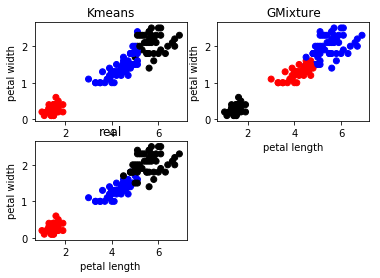

In [20]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import pylab as plt

iris=load_iris()
x,y=iris.data,iris.target

k=KMeans(n_clusters=3)
k.fit(x)
kk=k.predict(x)

gm=GaussianMixture(n_components=3)
gm.fit(x)
gk=gm.predict(x)

print(silhouette_score(x,kk))
print(silhouette_score(x,gk))

#plotting
colormap=np.array(['red','blue','black'])

def plot(i,target,title):
    plt.subplot(2,2,i)
    plt.scatter(x[:,2],x[:,3],c=colormap[target])
    plt.title(title)
    plt.xlabel('petal length')
    plt.ylabel('petal width')
    
plot(1,kk,'Kmeans')
plot(2,gk,'GMixture')
plot(3,y,'real')

plt.show()

# 9. KNN

In [21]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

iris=load_iris()
X_train,X_test,Y_train,Y_test=train_test_split(iris.data,iris.target,test_size=.25)

clf=KNeighborsClassifier()
clf.fit(X_train,Y_train)

print("Accuracy:",clf.score(X_test,Y_test))

print('Test data:')
print(Y_test)
print('Predicted data:')
print(clf.predict(X_test))

Accuracy: 0.9210526315789473
Test data:
[1 0 2 0 1 1 2 0 0 1 1 1 2 1 0 2 1 2 0 0 0 0 1 2 2 2 2 0 0 0 2 2 1 2 0 0 1
 2]
Predicted data:
[1 0 2 0 1 1 2 0 0 1 1 1 1 1 0 2 1 1 0 0 0 0 1 2 2 2 2 0 0 0 2 1 1 2 0 0 1
 2]


# 10. Locally Weighted regression

==========================values of x=====================
[0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33

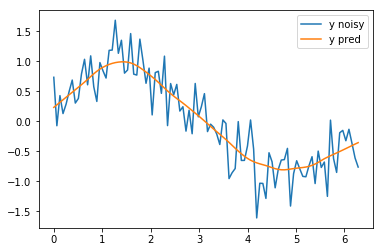

In [22]:
from math import ceil
import numpy as np
from scipy import linalg


def lowess(x, y, f=2./3., iter=3):
    n = len(x)
    r = int(ceil(f*n))
    h = [np.sort(np.abs(x - x[i]))[r] for i in range(n)]
    w = np.clip(np.abs((x[:,None] - x[None,:]) / h), 0.0, 1.0)
    w = (1 - w**3)**3
    yest = np.zeros(n)
    delta = np.ones(n)
    for iteration in range(iter):
        for i in range(n):
            weights = delta * w[:,i]
            b = np.array([np.sum(weights*y), np.sum(weights*y*x)])
            A = np.array([[np.sum(weights), np.sum(weights*x)],
                   [np.sum(weights*x), np.sum(weights*x*x)]])
            beta = linalg.solve(A, b)
            yest[i] = beta[0] + beta[1]*x[i]

        residuals = y - yest
        s = np.median(np.abs(residuals))
        delta = np.clip(residuals / (6.0 * s), -1, 1)
        delta = (1 - delta**2)**2

    return yest

if __name__ == '__main__':
    import math
    n = 100
    x = np.linspace(0, 2 * math.pi, n)
    print("==========================values of x=====================")
    print(x)
    y = np.sin(x) + 0.3*np.random.randn(n)
    print("================================Values of y===================")
    print(y)
    f = 0.25
    yest = lowess(x, y, f=f, iter=3)

    import pylab as pl
    pl.clf()
    pl.plot(x, y, label='y noisy')
    pl.plot(x, yest, label='y pred')
    pl.legend()
    pl.show()